number of estimated clusters : 6


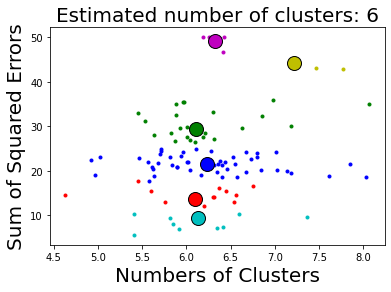

In [ ]:
# Program_8f.ipynb: Mean Shift Clustering Algorithm.
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
(x_train,y_train)=boston_housing.load_data(path="boston_housing.npz",test_split=0.2,seed=113)
num_houses , datacol = 100 , 5
plt.scatter(x_train[0][:,datacol][1:num_houses],y_train[1][1: \
                num_houses],marker="+")
# The following bandwidth can be automatically detected using
X  = np.vstack((x_train[0][:,datacol][1:num_houses] , \
       y_train[1][1:num_houses])).T
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=100)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)
import matplotlib.pyplot as plt
from itertools import cycle
plt.figure(1)
plt.clf()
colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,) 
fs = 20
plt.title("Estimated number of clusters: %d" % n_clusters_,fontsize=fs)
plt.xlabel("Numbers of Clusters",fontsize = fs)
plt.ylabel("Sum of Squared Errors",fontsize = fs)
plt.show()

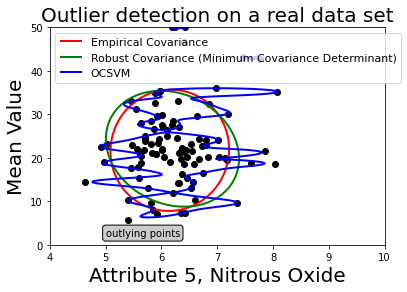

In [ ]:
# Program_8g.py: Elliptic envelopes and OCSVM.
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager
# Define "classifiers" to be used
classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.0, \
    contamination=0.25),
    "Robust Covariance (Minimum Covariance Determinant)": \
    EllipticEnvelope(contamination=0.25),
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.35),
}
colors = ["r", "g", "b"]
legend1 = {}
legend2 = {}
# Get data
X1 = np.vstack((x_train[0][:,datacol][1:num_houses] , \
         y_train[1][1:num_houses])).T
# Learn a frontier for outlier detection with several classifiers
xx1,yy1=np.meshgrid(np.linspace(4,10,500),np.linspace(0,50,500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i]
    )
legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())
# Plot the results (= shape of the data points cloud)
plt.figure(1)  # two clusters
plt.title("Outlier detection on a real data set (Boston Housing)")
plt.scatter(X1[:, 0], X1[:, 1], color="black")
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate(
    "outlying points",
    xy=(5, 2),
    xycoords="data",
    textcoords="data",
    xytext=(5, 2),
    bbox=bbox_args,
    arrowprops=arrow_args,
)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend(
    (
        legend1_values_list[0].collections[0],
        legend1_values_list[1].collections[0],
        legend1_values_list[2].collections[0],
    ),
    (legend1_keys_list[0],legend1_keys_list[1],legend1_keys_list[2]),
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
fs = 20
plt.title("Outlier detection on a real data set", fontsize=fs)
plt.xlabel("Attribute 5, Nitrous Oxide",fontsize = fs)
plt.ylabel("Mean Value",fontsize = fs)
plt.show()